In [545]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 15}
matplotlib.rc('font', **font)

#time
from datetime import datetime, timedelta
import time

#matlab import
import scipy.io
from scipy.io import savemat

#math
import numpy as np
from numpy import *
from scipy.optimize import curve_fit

from nanodrivers.visa_drivers.vna import VNA
from nanodrivers.visa_drivers.anapico import ANAPICO
from nanodrivers.visa_drivers.signal_analyser import Anri

In [4]:
anapico = ANAPICO('TCPIP0::169.254.12.34::inst0::INSTR')
anapico.idn()

Connection exist: AnaPico AG,APMS20G,3C6-0B4F40003-0985,0.4.209



In [563]:
vna = VNA(device_num="TCPIP0::169.254.36.111::hislip0::INSTR")
vna.idn()

Connection exist: Rohde-Schwarz,ZNB20-2Port,1311601062102129,3.45



In [564]:
anri = Anri()
anri.idn()

Connection exist: ANRITSU,MS2830A,6200847105,4.09.01



In [459]:
anri.set_span(0.2e6)
anri.set_band_Hz(0.01e3)

In [565]:
anri.get_cent_freq()

3799550000.0

In [566]:
anri.get_span()

1000000.0

In [500]:
data_sweeps = []
def sweep(fLowerBound = float, fUpperBound = float, noSteps = int, freqDist = float, power = int):
    global data_sweeps
    df = (fUpperBound - fLowerBound) / noSteps
    f = fLowerBound
    for i in range(noSteps + 1):
        anri.set_cent_freq(f)
        anapico.set_freq(3, f - freqDist / 2)
        anapico.set_freq(4, f + freqDist / 2)
        anapico.set_power(3, power)
        anapico.set_power(4, power)
        data = anri.get_data() 
        data_sweeps.append(data)
        f = f + df
        print(i)
    #return data_sweeps

In [501]:
sweep(fLowerBound=3.69819e9, fUpperBound=3.89819e9, noSteps=4, freqDist=0.00001e9, power = -20)

0
1
2
3
4


In [464]:
sweep(fLowerBound=3.69819e9, fUpperBound=3.89819e9, noSteps=4, freqDist=0.00001e9, power = -10)

0
1
2
3
4


In [465]:
sweep(fLowerBound=3.69819e9, fUpperBound=3.89819e9, noSteps=4, freqDist=0.00001e9, power = -5)

0
1
2
3
4


In [466]:
sweep(fLowerBound=3.69819e9, fUpperBound=3.89819e9, noSteps=4, freqDist=0.00001e9, power = -3)

0
1
2
3
4


In [467]:
print(len(data_sweeps))

20


In [498]:
print(len(test))

23


In [310]:
test = []

In [319]:
test.pop()

array([-114.185, -114.585, -115.125, ..., -112.973, -111.887, -110.916])

In [423]:
test1 = anri.get_data()

In [505]:
anri.set_cent_freq(3.79819e9)
anri.set_span(0.3e6)
anri.set_band_Hz(0.01e3)

anapico.set_freq(3, 3.798195e9)
anapico.set_freq(4, 3.798185e9)
anapico.set_power(3, -15)
anapico.set_power(4, -15)

Unable to connect device.
 VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.
Check that device is connected, visible in NI MAX and is not used by another software.
Unable to connect device.
 VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.
Check that device is connected, visible in NI MAX and is not used by another software.
Unable to connect device.
 VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.
Check that device is connected, visible in NI MAX and is not used by another software.
Unable to connect device.
 VI_ERROR_CONN_LOST (-1073807194): The connection for the given session has been lost.
Check that device is connected, visible in NI MAX and is not used by another software.


In [496]:
test.append(anri.get_data())

In [576]:
vna_sweep = vna.get_data()

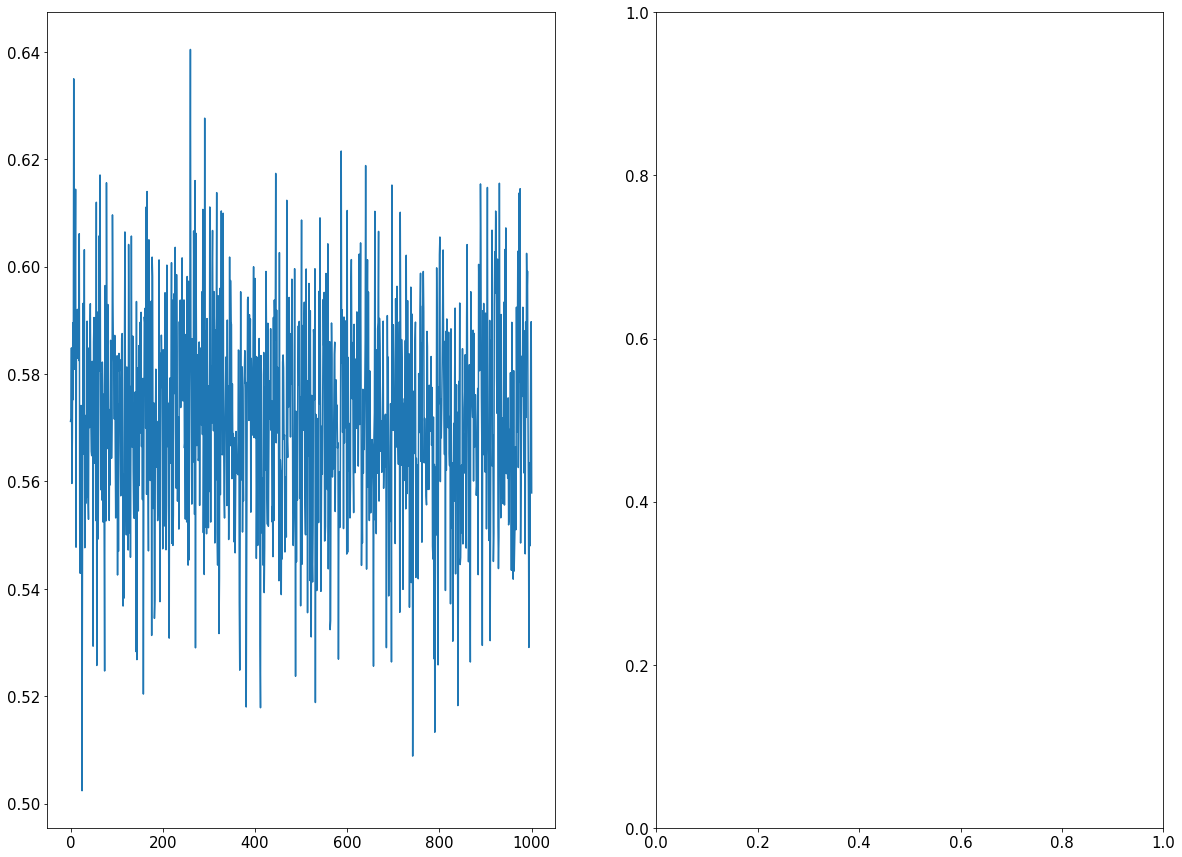

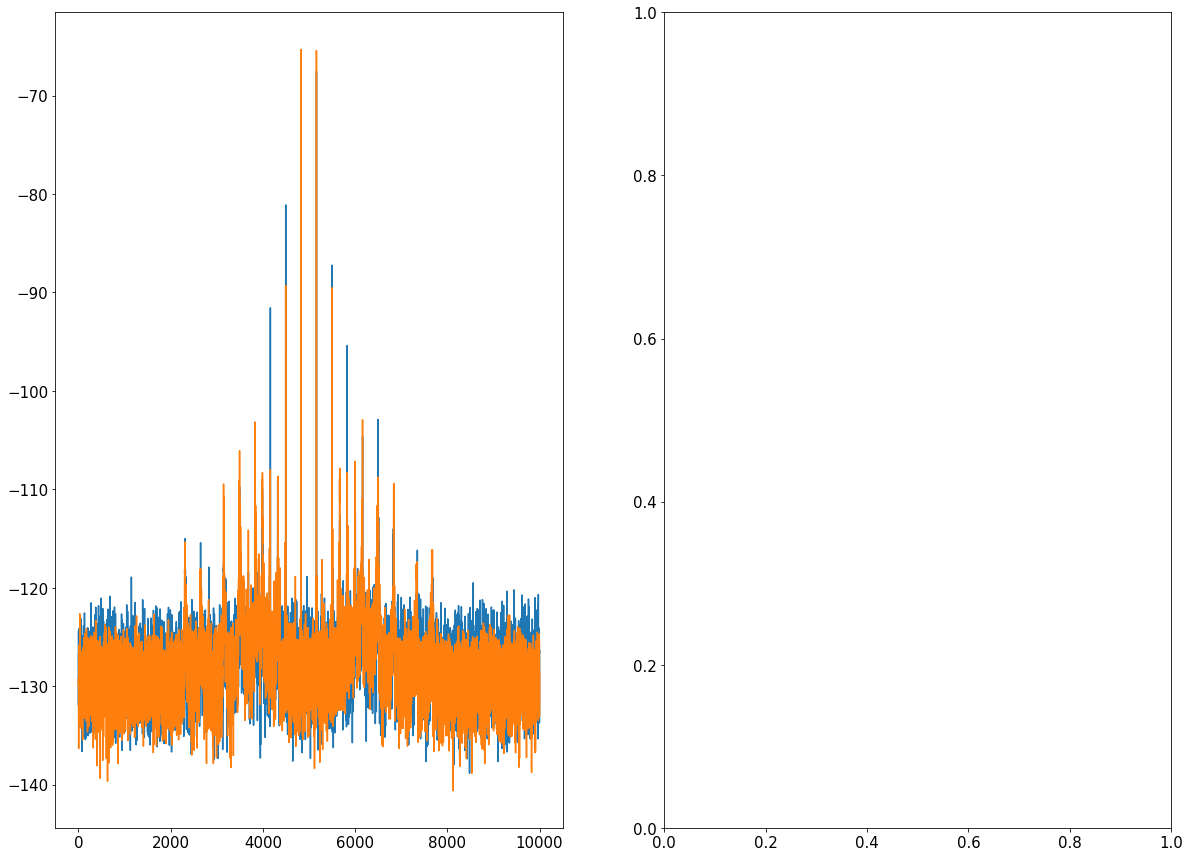

In [497]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].plot(test[21])
ax[0].plot(test[22])

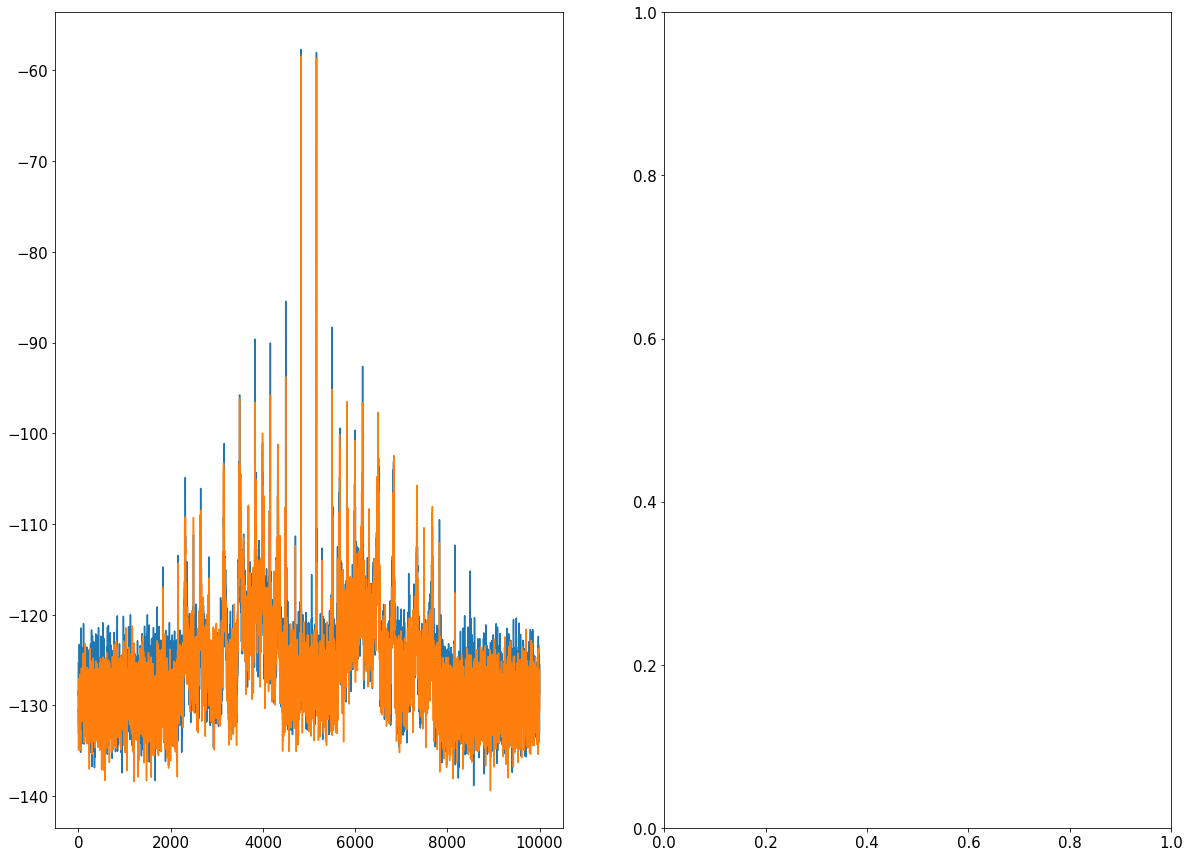

In [492]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].plot(test[19])
ax[0].plot(test[20])

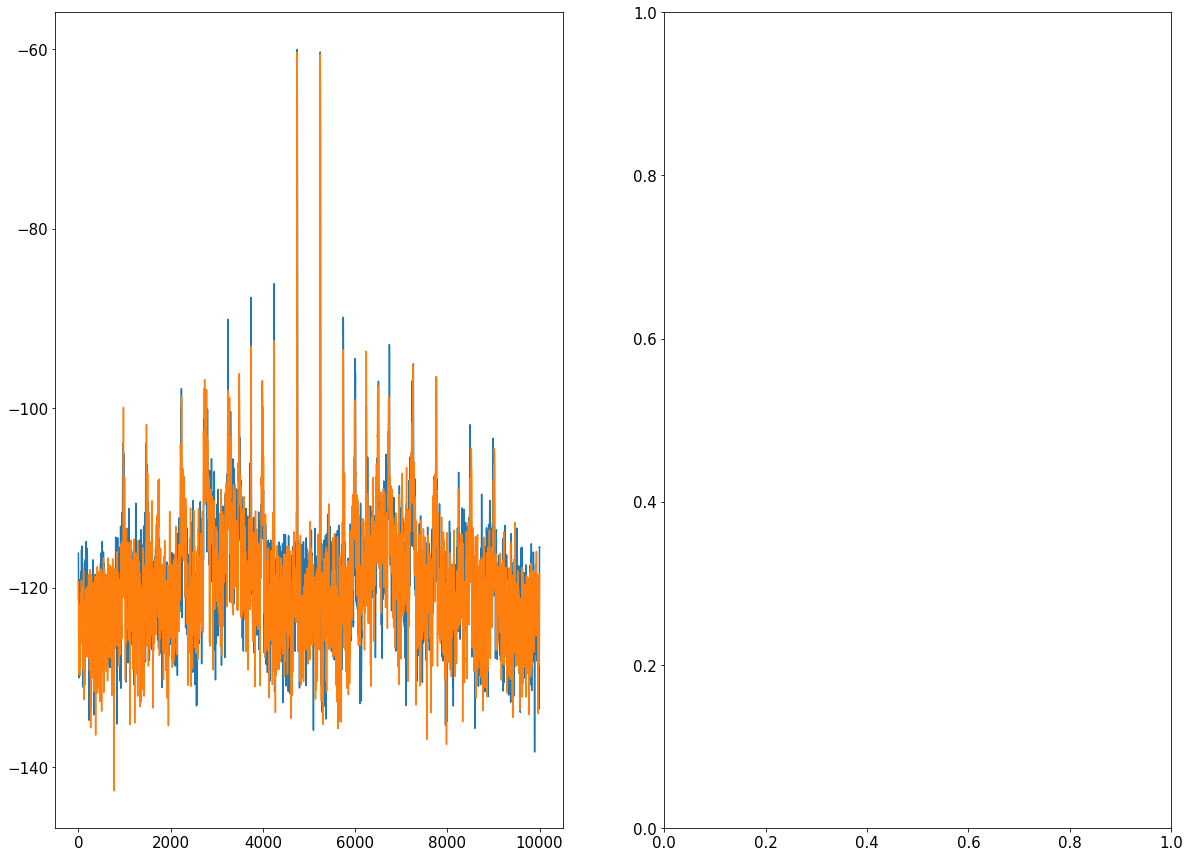

In [447]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].plot(test[11])
ax[0].plot(test[12])

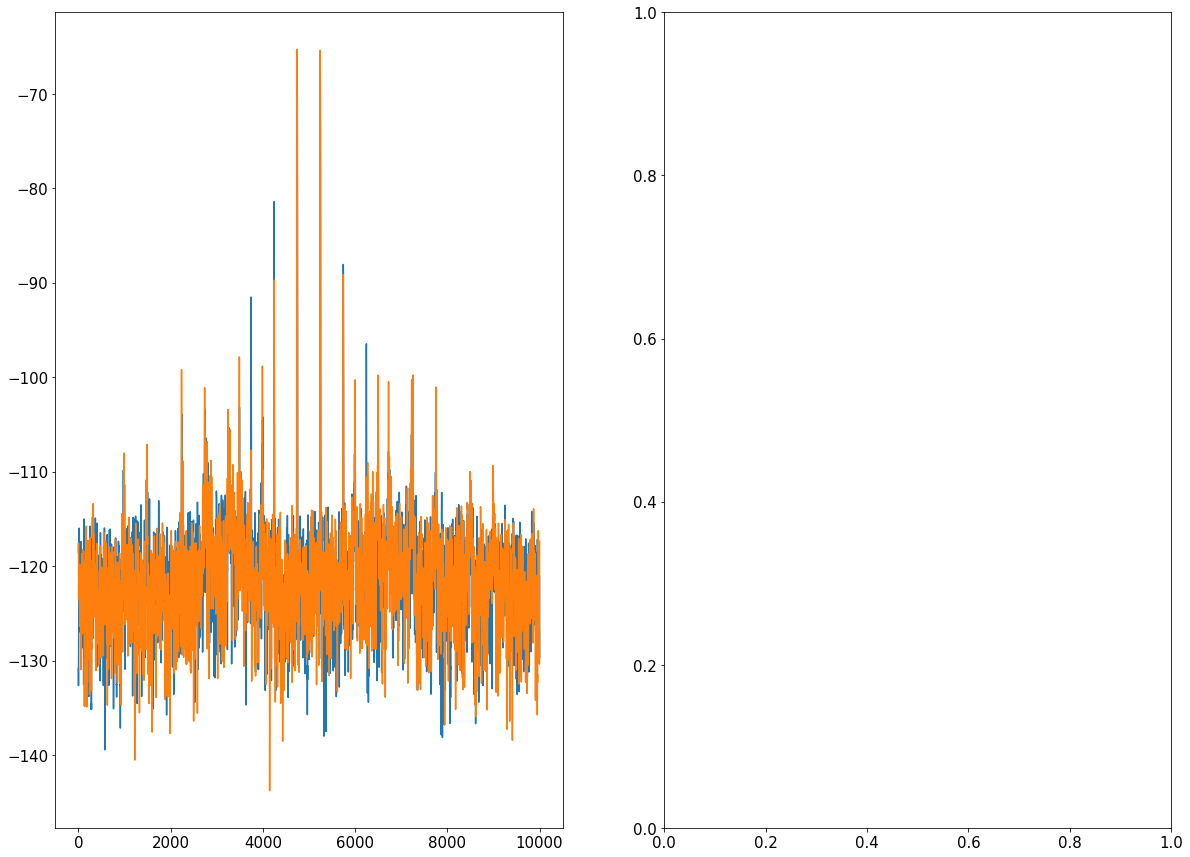

In [452]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].plot(test[13])
ax[0].plot(test[14])

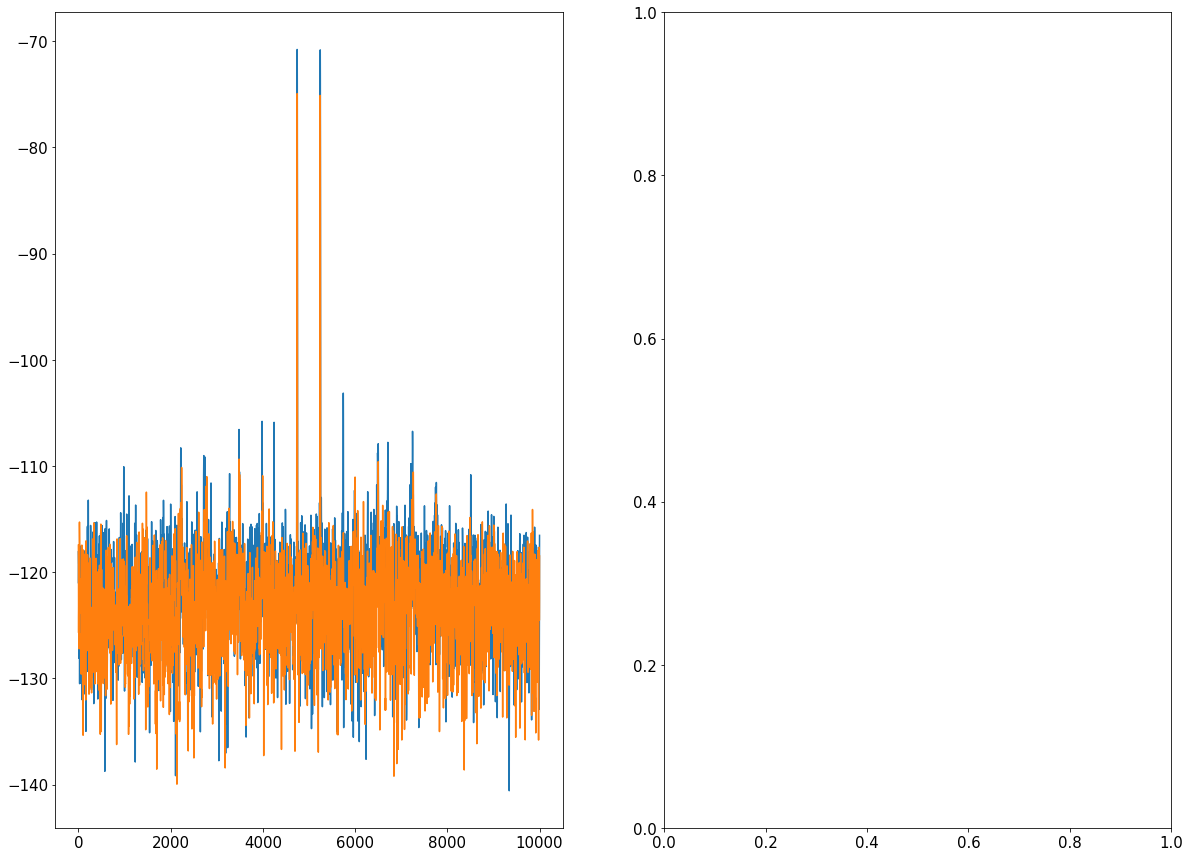

In [458]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].plot(test[15])
ax[0].plot(test[16])

In [ ]:
freq = vna.get_freq()
print(freq)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,15))
ax[0].plot(data_sweeps[7])
# ax[1].set_title('Slopes of e')

In [167]:
anapico.get_status(3)
anapico.get_status(4)

1.0

In [26]:
anapico.set_on(3)
anapico.set_on(4)

In [552]:
vna.get_power()

-10.0

In [551]:
vna.set_power(-10)

In [585]:
vna.get_span()

4000000.0

In [587]:
vna.set_cent_freq(3.79905)

In [586]:
vna.get_cent_freq()

3798188800.0

In [570]:
vna.get_band()

100.0

In [524]:
vna.get_nop()

1001

In [556]:
vna.get_sweep_time()

10.55054

In [575]:
vna.get_status()

1

In [574]:
vna.set_on()

In [1]:
anapico.set_power(3,-40)
anapico.set_power(4,-40)
anapico.set_on(3)
anapico.set_on(4)
input_signal = anri.get_data()

NameError: name 'anapico' is not defined

In [525]:
vna.dump()

{'device': 'TCPIPInstrument at TCPIP0::169.254.36.111::hislip0::INSTR',
 'type': 'POIN',
 'ref_source': 'INT',
 'form': 0,
 'cent_freq': 3798188800.0,
 'span': 4000000.0,
 'star_freq': nan,
 'stop_freq': nan,
 'cw_freq': nan,
 'freq': nan,
 'elength': 0.0,
 'status_output': 0,
 'nop': 1001,
 'band': 100.0,
 'power': -10.0,
 'avg_status': 0,
 'avgs': 1}

In [470]:
state=dict()
state['temp'] = 7.4

state['dump_vna'] = vna.dump()
state['dump_anapico'] = anapico.dump()
state['data_sweeps'] = data_sweeps

In [471]:
state

{'temp': 7.4,
 'dump_vna': {'device': 'TCPIPInstrument at TCPIP0::169.254.36.111::hislip0::INSTR',
  'type': 'LIN',
  'ref_source': 'INT',
  'form': 0,
  'cent_freq': 3798188800.0,
  'span': 2000000.0,
  'star_freq': 3797188800.0,
  'stop_freq': 3799188800.0,
  'cw_freq': nan,
  'freq': array([3.7971888e+09, 3.7971908e+09, 3.7971928e+09, ..., 3.7991848e+09,
         3.7991868e+09, 3.7991888e+09]),
  'nop': 1001,
  'elength': 0.0,
  'status_output': 0,
  'band': 100.0,
  'power': -10.0,
  'avg_status': 0,
  'avgs': 1},
 'dump_anapico': {'device': 'TCPIPInstrument at TCPIP0::169.254.12.34::inst0::INSTR',
  'channel_status': array([0., 0., 1., 1.]),
  'channel_freqs': array([1.000000e+09, 1.000000e+09, 3.898185e+09, 3.898195e+09]),
  'channel_pows': array([ 0.,  0., -3., -3.])},
 'data_sweeps': [array([-120.674, -119.835, -119.007, ..., -124.061, -123.98 , -121.682]),
  array([-121.45 , -121.546, -121.112, ..., -119.319, -120.252, -121.277]),
  array([-120.   , -118.251, -117.284, ..., -1

In [472]:
now = datetime.now()  
folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\IMS_summer_pro'
file = r'1st_test_'+ now.strftime(r'%Y%m%d%H%M%S') + '.mat'
file_name = folder +'\\' + file

In [473]:
savemat(file_name, state)